In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/ Gc_BD.csv')
data.head()

,Site,Date,Shift,Machine type,Machine No,BD Time Start,BD Time Stop,Time lost,Time Lost Mins,Time Lost Hrs,Repair Done,Reason of repair,Reason of Repair,Reason of BD,Reason of delay,Remarks
0,Gopalichack,02/14/2024,A,Truck,V-7,9:18,14:20,5:02,302.00,5.03,Washing &tyre change,Tyre Puncture,NaN,NaN,NaN,NaN
1,Gopalichack,02/14/2024,B,Truck,V-12,15:43,16:01,0:18,18.00,0.30,tyre puncher,Tyre Puncture,NaN,NaN,NaN,NaN
2,Gopalichack,02/14/2024,B,Truck,V-8,14:07,16:30,2:23,143.00,2.38,Washing &Airfilter cap paking,WGM,NaN,NaN,NaN,NaN
3,Gopalichack,02/14/2024,B,Truck,V-13,16:30,--------------,#VALUE!,#VALUE!,#VALUE!,AD blue tank break down,NaN,NaN,NaN,NaN,NaN
4,Gopalichack,02/15/2024,A,Truck,V-2,12:10,13:45,1:35,95.00,1.58,Washing&Service,WGM,NaN,NaN,NaN,NaN


In [ ]:
data['Reason of repair '].value_counts()

Reason of repair 
Tyre Puncture             300
WGM                       105
Lock Pin Change            86
Filter cleaning            62
Filter change              51
Service                    36
Others                     29
Washing                    18
Greasing                   17
Tooth point                17
Tyre Change                13
Tooth pin                   9
Oil Change                  9
Light Change                7
Tyre puncture               4
Leaf Spring                 3
Suspension Leaf Change      3
Bulb change                 3
Distilled Water             2
Maintenance                 2
Tyre Blast                  1
Name: count, dtype: int64

In [ ]:
data['Date'].dtype

dtype('O')

In [ ]:
# Try using a more flexible format or 'mixed' format to handle inconsistencies
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y', errors='coerce')
# or
# data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

# Check for NaT (Not a Time) values after conversion to identify problematic dates
print(data['Date'].isna().sum())

# Print the problematic dates for further inspection
print(data[data['Date'].isna()])

1503
             Site Date Shift Machine type Machine No BD Time Start  \
0     Gopalichack  NaT     A        Truck        V-7          9:18   
1     Gopalichack  NaT     B        Truck       V-12         15:43   
2     Gopalichack  NaT     B        Truck        V-8         14:07   
3     Gopalichack  NaT     B        Truck       V-13         16:30   
4     Gopalichack  NaT     A        Truck        V-2         12:10   
...           ...  ...   ...          ...        ...           ...   
1567  Gopalichack  NaT   NaN          NaN        NaN           NaN   
1568  Gopalichack  NaT   NaN          NaN        NaN           NaN   
1569  Gopalichack  NaT   NaN          NaN        NaN           NaN   
1570  Gopalichack  NaT   NaN          NaN        NaN           NaN   
1571  Gopalichack  NaT   NaN          NaN        NaN           NaN   

            BD Time Stop Time lost Time Lost Mins Time Lost Hrs  \
0                  14:20      5:02         302.00          5.03   
1                  1

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y') # Use %Y for four-digit year format
print(data['Date'].dtype)

datetime64[ns]


In [ ]:
data = data.sort_values(by='Date')
data.head()

,Site,Date,Shift,Machine type,Machine No,BD Time Start,BD Time Stop,Time lost,Time Lost Mins,Time Lost Hrs,Repair Done,Reason of repair,Reason of Repair,Reason of BD,Reason of delay,Remarks
32,Gopalichack,2024-01-03,A,Truck,V-8,9:53,10:27,0:34,34.00,0.57,tyre puncher,Tyre Puncture,NaN,NaN,NaN,NaN
142,Gopalichack,2024-01-03,NaN,Truck,V-11,NaN,NaN,0:00,0.00,0.00,OIL bath and air filter a/c folter cilling,Filter cleaning,NaN,NaN,NaN,"On site BD/repair, time not captured"
141,Gopalichack,2024-01-03,NaN,Truck,V-15,NaN,NaN,0:00,0.00,0.00,1 AXCLE and 2 axcle new tyre fitting 4 pic,Tyre Change,NaN,NaN,NaN,"On site BD/repair, time not captured"
140,Gopalichack,2024-01-03,NaN,Truck,V-11,NaN,NaN,0:00,0.00,0.00,LHS 1 axle outer tyre puncher,Tyre Puncture,NaN,NaN,NaN,"On site BD/repair, time not captured"
139,Gopalichack,2024-01-03,NaN,Truck,V-8,NaN,NaN,0:00,0.00,0.00,RHS 2ND axle outer tyre puncher,Tyre Puncture,NaN,NaN,NaN,"On site BD/repair, time not captured"


In [ ]:
data['Machine No'].unique()

array(['V-8', 'V-11', 'V-15', 'S-7', 'S-3', 'S-2', 'V-9', 'V-7', 'V-13',
       'V-1', 'SANY-7', 'V-6', 'SANY-2,3,7', 'v-2', 'SANY-3', 'V-14',
       'V-3', 'V-10', 'V-09', 'V-04', 'V-08', 'V-03', 'DOZER-1', 'V-12',
       'SANY-2', 'V-2', 'V-20', 'V-4', 'Sany-7', 'v2', 'v-9', 'v-1',
       'v-8', 'sany -3', 'Sany-3', 'sany-7', 'v-4', 'v-3', 'v-10', 'v-11',
       'sany-2', 'v-14', 'SANY -2', 'v-15', 'sany-3', 's-2', 's-3', 's-7',
       'S-2,3,7', 'V-5', 'v-7', 'Sany-2', 'Sany-1', 'V2', 'v-10,11,12',
       'V-14,3,4,5 ', 'Sany-2,3,7', 'V-16', 'Sany-2.3.7', 'v-13',
       'Saany 2', 'Volvo', 'Saany 3', 'Sanny 7', 'Volvo 1', 'Sany 7',
       'Volvo 12', 'Sany 2', 'Sany 3', 'Volvo 3', 'Volvo 10', 'Volvo 9',
       'Volvo 11', 'Volvo 15', 'Sany 2 ', 'Volvo 13', 'Volvo 4',
       'Volvo 5 ', 'Volvo 6', 'Volvo 14', 'SANY7', 'DOZER-3', 'CAMPER ',
       'V-01', 'V-', 'V-06', 'Dozer-1', 'Grader-1', 'Dozer-3',
       'Water tanker', 'SANY-', 'WATER TANKER', nan], dtype=object)

In [ ]:
data['Machine type'].unique()

array(['Truck', 'Excavator', 'Dozer', nan, 'Grader'], dtype=object)

In [ ]:
data['Machine No'] = data['Machine No'].str.replace('Sany', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('Sanny', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('Saany', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('Sany', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('sany', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('Volvo', 'V' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('s', 'SANY' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('v', 'V' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('Dozer', 'DOZER' ,regex = True)
data['Machine No'] = data['Machine No'].str.replace('SANY ', 'SANY' ,regex = True)
data['Machine No'].unique()

array(['V-8', 'V-11', 'V-15', 'S-7', 'S-3', 'S-2', 'V-9', 'V-7', 'V-13',
       'V-1', 'SANY-7', 'V-6', 'SANY-2,3,7', 'V-2', 'SANY-3', 'V-14',
       'V-3', 'V-10', 'V-09', 'V-04', 'V-08', 'V-03', 'DOZER-1', 'V-12',
       'SANY-2', 'V-20', 'V-4', 'V2', 'S-2,3,7', 'V-5', 'SANY-1',
       'V-10,11,12', 'V-14,3,4,5 ', 'V-16', 'SANY-2.3.7', 'SANY2', 'V',
       'SANY3', 'SANY7', 'V 1', 'V 12', 'V 3', 'V 10', 'V 9', 'V 11',
       'V 15', 'SANY2 ', 'V 13', 'V 4', 'V 5 ', 'V 6', 'V 14', 'DOZER-3',
       'CAMPER ', 'V-01', 'V-', 'V-06', 'Grader-1', 'Water tanker',
       'SANY-', 'WATER TANKER', nan], dtype=object)

In [ ]:
data.columns

Index(['Site', 'Date', 'Shift', 'Machine type', 'Machine No', 'BD Time Start',
       'BD Time Stop', 'Time lost', 'Time Lost Mins', 'Time Lost Hrs',
       'Repair Done', 'Reason of repair ', 'Reason of Repair', 'Reason of BD',
       'Reason of delay', 'Remarks'],
      dtype='object')

In [ ]:
td = data[data['Reason of repair '].str.contains('Tyre|tyre', na=False)]
td.tail()

,Site,Date,Shift,Machine type,Machine No,BD Time Start,BD Time Stop,Time lost,Time Lost Mins,Time Lost Hrs,Repair Done,Reason of repair,Reason of Repair,Reason of BD,Reason of delay,Remarks
783,Gopalichack,NaT,NaN,Truck,V-2,NaN,NaN,0:00,0.00,NaN,RHS4th axle outer tyre puncture,Tyre Puncture,Tyre Puncture,NaN,NaN,NaN
785,Gopalichack,NaT,NaN,Truck,V-1,NaN,NaN,0:00,0.00,NaN,RHS 3rd axle remold tyre puncture,Tyre Puncture,Tyre Puncture,NaN,NaN,NaN
788,Gopalichack,NaT,NaN,Truck,V-8,NaN,NaN,0:00,0.00,NaN,RHS 4h axle inner tyre puncture,Tyre Puncture,Tyre Puncture,NaN,NaN,NaN
790,Gopalichack,NaT,NaN,Truck,V-14,NaN,NaN,0:00,0.00,NaN,RHS 3rd axle 2 remold tyre fitting(MRF tyre re...,Tyre Change,Tyre Change,NaN,NaN,NaN
791,Gopalichack,NaT,NaN,Truck,V-4,NaN,NaN,0:00,0.00,NaN,RHS 3rd axle inner tyre puncture.,Tyre Puncture,Tyre Puncture,NaN,NaN,NaN


In [ ]:
td['Reason of repair '].unique()

array(['Tyre Puncture', 'Tyre Change', 'Tyre puncture', 'Tyre Blast'],
      dtype=object)

In [ ]:
td['Reason of repair '] = td['Reason of repair '].str.replace('Tyre puncture', 'Tyre Puncture', regex=True)
td['Reason of repair '].value_counts()

Reason of repair 
Tyre Puncture    304
Tyre Change       13
Tyre Blast         1
Name: count, dtype: int64

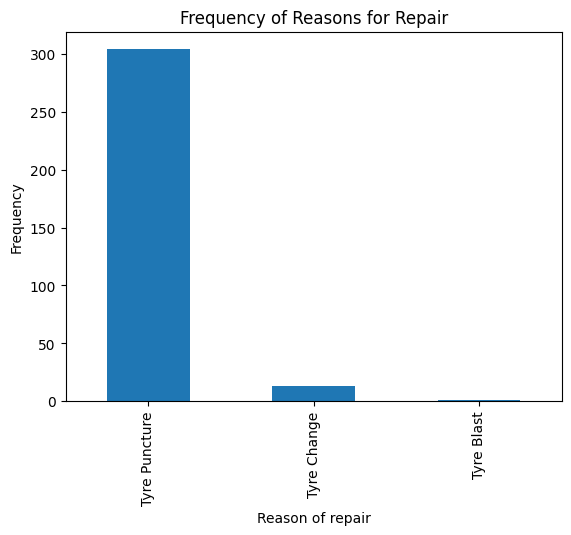

In [ ]:
import matplotlib.pyplot as plt
td['Reason of repair '].value_counts().plot(kind='bar')
plt.xlabel('Reason of repair')
plt.ylabel('Frequency')
plt.title('Frequency of Reasons for Repair')
plt.show()

In [ ]:
td.head()

,Site,Date,Shift,Machine type,Machine No,BD Time Start,BD Time Stop,Time lost,Time Lost Mins,Time Lost Hrs,Repair Done,Reason of repair,Reason of Repair,Reason of BD,Reason of delay,Remarks
32,Gopalichack,2024-01-03,A,Truck,V-8,9:53,10:27,0:34,34.00,0.57,tyre puncher,Tyre Puncture,NaN,NaN,NaN,NaN
141,Gopalichack,2024-01-03,NaN,Truck,V-15,NaN,NaN,0:00,0.00,0.00,1 AXCLE and 2 axcle new tyre fitting 4 pic,Tyre Change,NaN,NaN,NaN,"On site BD/repair, time not captured"
140,Gopalichack,2024-01-03,NaN,Truck,V-11,NaN,NaN,0:00,0.00,0.00,LHS 1 axle outer tyre puncher,Tyre Puncture,NaN,NaN,NaN,"On site BD/repair, time not captured"
139,Gopalichack,2024-01-03,NaN,Truck,V-8,NaN,NaN,0:00,0.00,0.00,RHS 2ND axle outer tyre puncher,Tyre Puncture,NaN,NaN,NaN,"On site BD/repair, time not captured"
35,Gopalichack,2024-01-03,B,Truck,V-11,14:11,17:14,3:03,183.00,3.05,New tyre change,Tyre Change,NaN,NaN,NaN,NaN


In [ ]:
td.to_csv('filename1.csv', index=False)

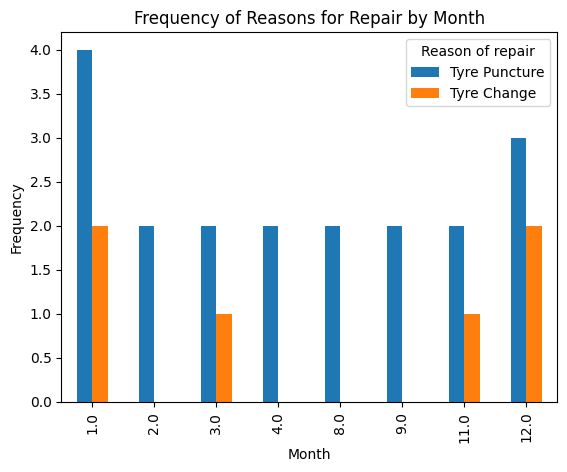

In [ ]:
# Convert the 'Date' column to datetime objects, specifying the format
td['Date'] = pd.to_datetime(td['Date'], format='%m/%d/%Y')

# Extract the month
td['Month'] = td['Date'].dt.month

# Group the data by month and count the frequency of repairs
monthly_counts = td.groupby('Month')['Reason of repair '].value_counts().unstack(fill_value=0)

# Plot the graph
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Reasons for Repair by Month')
plt.legend(title='Reason of repair')
plt.show()